In [106]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_bt = pd.read_json('/Users/trevor/Desktop/Research/climate-trends/unique_english_abstract_not_null_bertopic_embeddings.json')

In [3]:
df_bt.shape
# 71,887 abstracts

(71887, 60)

In [4]:
df_bt.columns

Index(['indexed', 'reference-count', 'publisher', 'issue', 'license',
       'content-domain', 'short-container-title', 'published-print', 'DOI',
       'type', 'created', 'page', 'source', 'is-referenced-by-count', 'title',
       'prefix', 'volume', 'author', 'member', 'published-online', 'reference',
       'container-title', 'language', 'link', 'deposited', 'score', 'resource',
       'issued', 'references-count', 'journal-issue', 'alternative-id', 'URL',
       'ISSN', 'issn-type', 'published', 'abstract', 'original-title',
       'archive', 'update-policy', 'assertion', 'relation', 'subtitle',
       'published-other', 'special_numbering', 'update-to', 'editor', 'funder',
       'issue-title', 'article-number', 'updated-by', 'accepted',
       'earliest_pub_year', 'cleaned_abstract', 'chair', 'translator',
       'clinical-trial-number', 'topic', 'probability', 'Name', 'embedding'],
      dtype='object')

In [36]:
def clean_topic_names(name):
    removed_number = re.sub(r"\d+_", "", name)
    underscores_removed = re.sub("_", ", ", removed_number)
    return underscores_removed

In [37]:
df_bt['Name_cleaned'] = df_bt['Name'].apply(clean_topic_names)

In [38]:
df_bt['Name_cleaned']

0                        tcr, ecs, forcing, tcre
1        -climate, change, climate change, model
2        -climate, change, climate change, model
3        -climate, change, climate change, model
4                       article, doi, https, com
                          ...                   
71882    -climate, change, climate change, model
71883    -climate, change, climate change, model
71884                injection, oil, coreservoir
71885                        ci, 95 ci, patients
71886    -climate, change, climate change, model
Name: Name_cleaned, Length: 71887, dtype: object

In [65]:
topic_values = pd.DataFrame(df_bt.value_counts('Name_cleaned').items())

In [66]:
topic_values

,0,1
0,"-climate, change, climate change, model",42955
1,"bp, holocene, ka, cal",1701
2,"vegetation, china, precipitation, trend",1235
3,"ice, model, sea, aerosol",1171
4,"scenarios, future, rcp, water",788
...,...,...
348,"disease, pear, infection, stb",10
349,"salen, tfa, mebtz, bpdc",10
350,"pakistan, cvp, agriculture, csf",10
351,"hush, leave gap, modelers becoming less, phase...",10


In [114]:
median_topic_count = np.percentile(topic_values[1], 50)

In [115]:
median_topic_count

28.0

In [67]:
top10 = list(topic_values.iloc[1:11, 0])

In [68]:
top10

['bp, holocene, ka, cal',
 'vegetation, china, precipitation, trend',
 'ice, model, sea, aerosol',
 'scenarios, future, rcp, water',
 'farmers, adaptation, households, household',
 'building, energy, buildings, thermal',
 'injection, oil, coreservoir',
 'urban, energy, adaptation, development',
 'pacific, anomalies, anomalous, sst',
 'co2 emissions, emissions, china, carbon']

In [69]:
top10_df = df_bt[df_bt['Name_cleaned'].isin(top10)]

In [72]:
top10_df_by_year = top10_df.groupby(['earliest_pub_year', 'Name_cleaned']).size().unstack(fill_value=0)

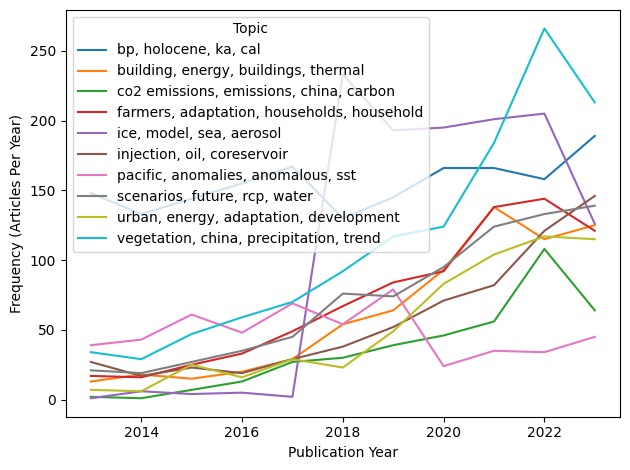

In [90]:
top10_df_by_year.plot(kind = "line")
plt.xlabel('Publication Year')
plt.ylabel('Frequency (Articles Per Year)')
plt.legend(title = 'Topic', loc = 'upper left')
plt.tight_layout()
plt.show()

In [93]:
df_bt_by_year = df_bt.groupby(['Name_cleaned', 'earliest_pub_year']).size().unstack(fill_value=0)

In [108]:
df_bt_by_year['change'] = df_bt_by_year.iloc[:,6:].apply(np.mean, axis = 1) / df_bt_by_year.iloc[:,:5].apply(np.mean, axis = 1)

In [122]:
df_bt_by_year[(df_bt_by_year.sum(axis = 1) >= median_topic_count) & (df_bt_by_year['change'] < np.inf)].sort_values('change', ascending = False)

earliest_pub_year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,change
Name_cleaned,,,,,,,,,,,,
"ice, model, sea, aerosol",1,6,4,5,2,233,193,195,201,205,126,51.111111
"energy, system, pv, heating",1,0,0,0,0,3,1,6,10,13,8,38.000000
"lcz, lst, urban, lczs",1,0,0,0,0,1,6,3,6,8,15,38.000000
"cement, curing, concrete, carbonation",1,1,0,0,0,2,3,9,12,20,25,34.500000
"learning, detection, machine, machine learning",0,0,0,2,0,1,1,5,6,21,34,33.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
"pacific, anomalies, enso, atlantic",13,11,11,10,9,10,9,3,6,2,4,0.444444
"et al, science issue, al, et",13,12,16,29,9,17,9,15,9,1,1,0.443038
"cloud, clouds, biases, convective",7,11,15,7,4,7,4,4,2,5,3,0.409091


In [124]:
df_bt_by_year[(df_bt_by_year.sum(axis = 1) >= median_topic_count) & (df_bt_by_year['change'] == np.inf)]

earliest_pub_year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,change
Name_cleaned,,,,,,,,,,,,
"aerosols, indoor, brc, cooking",0,0,0,0,0,1,2,1,0,6,8,inf
"biojet fuel, bio heavy oil, bio heavy, biojet",0,0,0,0,0,1,4,0,1,2,2,inf
"briefing, pertinent information presenting, articles context, time selecting",0,0,0,0,0,0,4,2,2,6,1,inf
"bu, bir, iklim, ile",0,0,0,0,0,0,0,1,0,8,8,inf
"building, energy, energy consumption, buildings",0,0,0,0,0,3,1,3,4,4,6,inf
"cnrm cmcmgcm ensemble, ensemble",0,0,0,0,0,2,1,1,5,1,2,inf
"correction paper published, correction paper, paper published, paper published https",0,0,0,0,0,1,0,4,9,0,2,inf
"curr, rm, text, hbox",0,0,0,0,0,0,5,5,1,3,2,inf
"electrical, optimal, demand, energy",0,0,0,0,0,0,0,3,0,6,5,inf
